In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
som for fraud detection
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [1]:
# here we are using som for fraud detection
# from customers of bank applying for advance credit card i.e. data provided by customer while
# filling the application form & our aim is to detect fraud in this application


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('../data/Credit_Card_Applications.csv')

In [33]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [34]:
# all the customer are input to our neural network. these input points are mapped in new output
# space and b/w the input space and output space we have neural network with neurons. 
# Each neuron is initialized as vector of weights with same size as customer
# output is neuron closest to each customer & this neuron is called winning node
# which is more similar to customer
# we use gaussian neighbourhood like function to update the weight of neighbour of the winning 
# node to move node to customer and keep repeating
# on each repeatation the output space reduces its dimension & stops to a point where neighbour 
# hood or output space stops decreasing and we will get SOM in 2D

# fraud are detected as outliar neuron as it is far from general rule
# to find out outliar neuron in som we find out mid (mean interneuron dist) i.e dist between a
# neuron & its neighboor neuron. neighboor neuron is defined manually
# ouliar dist will be more then this mid

In [35]:
X= df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [36]:
X

array([[  1.57761560e+07,   1.00000000e+00,   2.20800000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.21300000e+03],
       [  1.57395480e+07,   0.00000000e+00,   2.26700000e+01, ...,
          2.00000000e+00,   1.60000000e+02,   1.00000000e+00],
       [  1.56628540e+07,   0.00000000e+00,   2.95800000e+01, ...,
          2.00000000e+00,   2.80000000e+02,   1.00000000e+00],
       ..., 
       [  1.56754500e+07,   0.00000000e+00,   1.88300000e+01, ...,
          2.00000000e+00,   1.00000000e+02,   1.00000000e+00],
       [  1.57764940e+07,   0.00000000e+00,   2.74200000e+01, ...,
          2.00000000e+00,   1.20000000e+02,   1.20000000e+01],
       [  1.55924120e+07,   1.00000000e+00,   4.10000000e+01, ...,
          1.00000000e+00,   5.60000000e+02,   1.00000000e+00]])

In [37]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1,

In [38]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [39]:
X

array([[  8.42681467e-01,   1.00000000e+00,   1.25263158e-01, ...,
          5.00000000e-01,   5.00000000e-02,   1.21200000e-02],
       [  6.96090562e-01,   0.00000000e+00,   1.34135338e-01, ...,
          5.00000000e-01,   8.00000000e-02,   0.00000000e+00],
       [  3.88981656e-01,   0.00000000e+00,   2.38045113e-01, ...,
          5.00000000e-01,   1.40000000e-01,   0.00000000e+00],
       ..., 
       [  4.39420332e-01,   0.00000000e+00,   7.63909774e-02, ...,
          5.00000000e-01,   5.00000000e-02,   0.00000000e+00],
       [  8.44034934e-01,   0.00000000e+00,   2.05563910e-01, ...,
          5.00000000e-01,   6.00000000e-02,   1.10000000e-04],
       [  1.06907888e-01,   1.00000000e+00,   4.09774436e-01, ...,
          0.00000000e+00,   2.80000000e-01,   0.00000000e+00]])

In [40]:
# Training the SOM
# we use MiniSOM lib to implement SOM as sklearn doesn't have SOM
# Also make sure we included minisom.py file is same directory as our code is

from minisom import MiniSom
#input_len = no of feature in input
# x,y : no of dim in som 
som = MiniSom(x=10, y=10, input_len= 15, sigma=1.0, learning_rate=0.5)

In [41]:
# initialize weight with values close to 0
som.random_weights_init(X)

In [42]:
som.train_random(data=X, num_iteration=100)

In [43]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

In [44]:
bone() # create white object

In [24]:
som.distance_map()

array([[ 0.33594236,  0.5341713 ,  0.67904114,  0.5310721 ,  0.44799376,
         0.41910576,  0.54507466,  0.47996509,  0.27565264,  0.12286154],
       [ 0.48215831,  0.75797598,  0.80834584,  0.93686556,  0.80420502,
         0.59622862,  0.82698476,  0.83470323,  0.50937377,  0.32231218],
       [ 0.35087344,  0.56571731,  0.60837277,  0.8495158 ,  0.92123403,
         0.67008721,  0.85439144,  0.88875825,  0.72520419,  0.35717095],
       [ 0.32890061,  0.53802454,  0.69487435,  0.81149802,  0.97938182,
         0.88882826,  0.90836233,  0.78106391,  0.68578287,  0.45502048],
       [ 0.45633063,  0.77747995,  0.80877787,  1.        ,  0.96591851,
         0.82065879,  0.78816718,  0.80246529,  0.77302119,  0.45169357],
       [ 0.59099104,  0.8318744 ,  0.89004256,  0.82173048,  0.69619549,
         0.73828197,  0.76912695,  0.92063596,  0.84312445,  0.55274563],
       [ 0.47498128,  0.7266156 ,  0.61085851,  0.53541971,  0.53230737,
         0.62182556,  0.86970897,  0.93983543

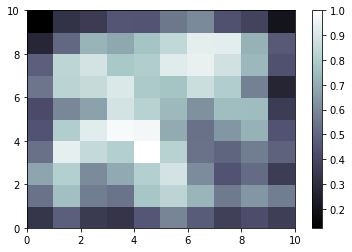

In [27]:
pcolor(som.distance_map().T)
colorbar()

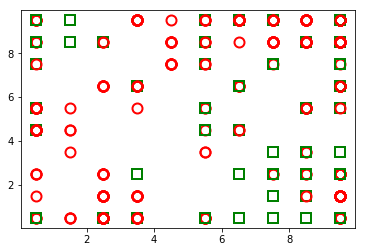

In [29]:
# red - customer who didn't get approval
# green = customer who got approval
markers=['o', 's']
colors=['r', 'g']
for i,x in enumerate(X):
    w=som.winner(x)
    # to place marker at centre
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]],
        markeredgecolor = colors[y[i]], markerfacecolor='None',
        markersize=10, markeredgewidth=2) 
show()
    

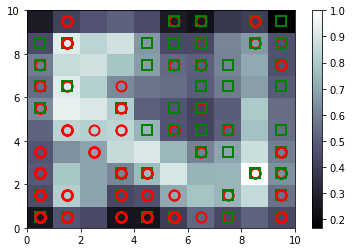

In [45]:
pcolor(som.distance_map().T)
colorbar()
# red - customer who didn't get approval
# green = customer who got approval
markers=['o', 's']
colors=['r', 'g']
for i,x in enumerate(X):
    w=som.winner(x)
    # to place marker at centre
    plot(w[0]+0.5, w[1]+0.5, markers[y[i]],
        markeredgecolor = colors[y[i]], markerfacecolor='None',
        markersize=10, markeredgewidth=2) 
show()

In [46]:
# Finding the frauds
mappings = som.win_map(X)

In [50]:
frauds= mappings[(8,2)]

In [51]:
frauds

[array([ 0.80274618,  0.        ,  0.16165414,  0.01785714,  0.5       ,
         0.76923077,  0.875     ,  0.05263158,  1.        ,  0.        ,
         0.        ,  0.        ,  0.5       ,  0.14      ,  0.00824   ]),
 array([ 0.47654858,  0.        ,  0.20932331,  0.05357143,  0.5       ,
         0.46153846,  0.375     ,  0.07017544,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.184     ,  0.        ]),
 array([ 0.82735685,  0.        ,  0.21548872,  0.53571429,  0.        ,
         0.69230769,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.5       ,  0.        ,  0.13212   ]),
 array([ 0.32182085,  0.        ,  0.07639098,  0.15767857,  0.        ,
         0.53846154,  0.875     ,  0.10526316,  1.        ,  0.        ,
         0.        ,  0.        ,  0.5       ,  0.12      ,  0.        ]),
 array([ 0.76672713,  0.        ,  0.10646617,  0.10714286,  0.5       ,
         0.38461538,  0.375     ,  0.001403

In [53]:
frauds= np.concatenate((mappings[(8,2)], mappings[(6, 8)]), axis = 0)

In [54]:
frauds

array([[  8.02746177e-01,   0.00000000e+00,   1.61654135e-01,
          1.78571429e-02,   5.00000000e-01,   7.69230769e-01,
          8.75000000e-01,   5.26315789e-02,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.00000000e-01,   1.40000000e-01,   8.24000000e-03],
       [  4.76548579e-01,   0.00000000e+00,   2.09323308e-01,
          5.35714286e-02,   5.00000000e-01,   4.61538462e-01,
          3.75000000e-01,   7.01754386e-02,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.84000000e-01,   0.00000000e+00],
       [  8.27356855e-01,   0.00000000e+00,   2.15488722e-01,
          5.35714286e-01,   0.00000000e+00,   6.92307692e-01,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.00000000e-01,   0.00000000e+00,   1.32120000e-01],
       [  3.21820854e-01,   0.00000000e+00,   7.63909774e-02,
     

In [55]:
frauds = sc.inverse_transform(frauds)

In [58]:
frauds[1]

array([  1.56847220e+07,   0.00000000e+00,   2.76700000e+01,
         1.50000000e+00,   2.00000000e+00,   7.00000000e+00,
         4.00000000e+00,   2.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   3.68000000e+02,   1.00000000e+00])